<a href="https://colab.research.google.com/github/date333cs/Start_Python/blob/master/ode101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 速習： 微分方程式をコンピュータで解く

目的： 答えを知りたいだけなら，こんな簡単に求まる，ということを知っておく．Last updated 2019.4.21

## 数値計算 （Scipy を使った数値計算）

実数を有限精度の数値（浮動小数点数）で近似し、数値と演算に対して丸め誤差を許容して計算を行なう

コード中，＃ の後はコメント

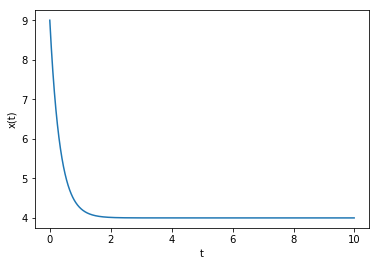

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(x, t): 
    return [12.0 - 3.0*x[0] ]    #  dx/dt = 12 - 3x(t)

x0 = [9.0]  # 初期値
t = np.arange(0, 10, 0.01)   # 横軸  t， 0 から 10 まで， 0.01 きざみで計算．  

x = odeint(f, x0, t)

plt.figure(0)
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

## 数式処理 （Sympy を使った数式処理）

コンピュータを用いて数式を記号的に処理する．抽象度の高い記号列を取り扱い，可能な範囲で代数的な規則に基づきながら厳密な記号処理を行う。

In [0]:
from sympy import *
x = Function('x')
t = Symbol('t')

ans = dsolve( diff(x(t)) + 3*x(t) -12, ics={x(0):9} )   #  dx/dt = 12 - 3x(t) の記述
print(ans)

Eq(x(t), C1*exp(-3*t) + 4)


ics （initial condition, 初値を与えて解く）は，Google Colab デフォルトでは，実装されていないもよう．


In [0]:
pip list | grep sympy

sympy                    1.1.1                


1分ほど時間がかかるが，新しいバージョンをインストールする．

In [0]:
pip install --upgrade sympy

    100% |████████████████████████████████| 5.3MB 7.0MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


インストールされた sympy のバージョンを確認する．

In [0]:
pip list | grep sympy

sympy                    1.4                  


もう一度同じコードを走らせてみる．

In [0]:
from sympy import *
x = Function('x')
t = Symbol('t')

ans = dsolve( diff(x(t)) + 3*x(t) -12, ics={x(0):9} )
print(ans)

Eq(x(t), 4 + 5*exp(-3*t))


### 例  y'=1/x

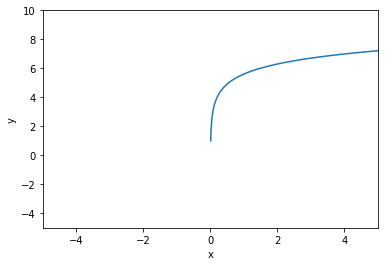

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, x): 
    return [1/x ]    #  dx/dt = x(t)

y0 = [1.0]  # 初期値
x = np.arange(0.01, 5, 0.01)   # 横軸  x= 0 から 5 まで， 0.01 きざみで計算．  

y = odeint(f, y0, x)

plt.figure(0)
plt.plot(x, y)
plt.xlim(-5, 5)
plt.ylim(-5, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.show()

In [0]:
from sympy import *
y = Function('y')
x = Symbol('x')

ans = dsolve( diff(y(x)) -1/x)
print(ans)

Eq(y(x), C1 + log(x))


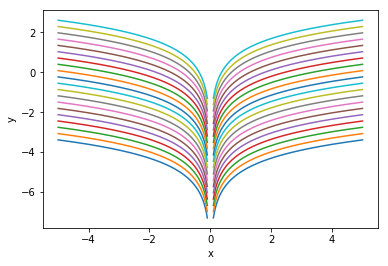

In [0]:
from pylab import *
x=linspace(0.1, 5,  1000)  # linspace (最初の値、最後の値、要素数）
[plot( x, C + log(x) )
  for C in linspace(-5,1, 20) ]
x=linspace(-5, -0.1,  1000)  
[plot( x, C + log(-x) )
  for C in linspace(-5,1, 20) ]
plt.xlabel("x")
plt.ylabel("y")
show()

### ベクトル場の表示

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


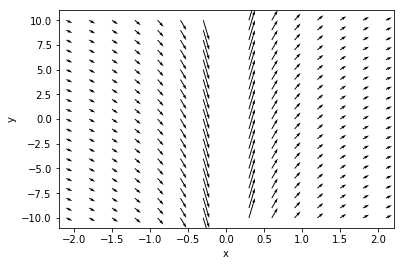

In [0]:
x, y = meshgrid(linspace(-3,3,21), linspace(-10,10,21) )
quiver(x, y, 1, 1/x)
xlim(-2.2, 2.2)
ylim(-11,11)
plt.xlabel("x")
plt.ylabel("y")
show()

In [0]:
from sympy import *
y = Function('y')
x = Symbol('x')

ans = dsolve( diff(y(x)) -1/x, ics={y(0.01):1} )
print(ans)

Eq(y(x), log(x) + 5.60517018598809)


数式処理おまけ

In [8]:
from sympy import *
from sympy.abc import x,y
init_printing()

expand( (x+y)**2 )

因数分解

In [12]:
factor ( x**2 - 2*x*y  + y**2)

In [10]:
sin(60*pi/180)

連立方程式を解く

In [11]:
solve( [x+2*y+3, x-2*y-5])

## 積分の計算

In [13]:
def f(x):
    return 1/sin(x)
integrate( f(x) )

教科書 矢嶋 p.17 第一章演習問題 (7)

In [14]:
def f(x):
    return x*exp(x)
integrate( f(x) )